In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
data_yaml = """
train: /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train
val: /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid
nc: 8
names:
  - Bad_Apple
  - Bad_Guava
  - Bad_Mango
  - Bad_Orange
  - Good_Apple
  - Good_Guava
  - Good_Mango
  - Good_Orange
"""

# Save the file
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(data_yaml)

print("✅ `data.yaml` has been created successfully!")

✅ `data.yaml` has been created successfully!


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 13.7 MB/s eta 0:00:0000:010:01


In [3]:
from ultralytics import YOLO

# Initialize YOLO model from scratch (no pretrained weights)
model = YOLO('yolov8s.yaml')  # Using YOLOv8s architecture

# Train the model
model.train(
    data='/kaggle/working/data.yaml',  # Path to your data.yaml
    epochs=10,
    imgsz=640,
    batch=16,
    project='/kaggle/working/fruitnet_training_scratch',
    name='experiment1',
    pretrained=False  # Training from scratch
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/fruitnet_training_scratch, name=experiment12, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, s

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels... 2192 images, 14 backgrounds, 0 corrupt: 100%|██████████| 2192/2192 [00:10<00:00, 218.36it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid/labels... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<00:00, 239.29it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/fruitnet_training_scratch/experiment12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/fruitnet_training_scratch/experiment12
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.78G      2.175      4.617      3.763         16        640: 100%|██████████| 137/137 [00:36<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


                   all        141        202     0.0213     0.0713     0.0174    0.00664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.79G      1.634      3.541      2.634         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

                   all        141        202      0.162      0.221      0.114     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.79G      1.235      2.736       2.02         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all        141        202      0.246      0.358      0.267      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.79G     0.9575      2.182      1.636         19        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all        141        202      0.208      0.475      0.354      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.8G      0.808      1.882      1.445         21        640: 100%|██████████| 137/137 [00:34<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all        141        202      0.441      0.447      0.453      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       4.8G     0.6969      1.667      1.324         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        141        202      0.386      0.489      0.485      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       4.8G     0.6174      1.482      1.246         29        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all        141        202      0.412      0.639      0.575      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       4.8G     0.5666      1.332      1.194         21        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        141        202       0.44      0.649       0.62      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       4.8G     0.5349      1.231      1.155         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        141        202      0.516      0.609      0.669      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10       4.8G     0.4994      1.132      1.128         22        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]

                   all        141        202      0.636      0.595      0.706      0.622



10 epochs completed in 0.103 hours.
Optimizer stripped from /kaggle/working/fruitnet_training_scratch/experiment12/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/fruitnet_training_scratch/experiment12/weights/best.pt, 22.5MB

Validating /kaggle/working/fruitnet_training_scratch/experiment12/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]


                   all        141        202      0.636      0.595      0.706      0.621
             Bad_Apple         25         26      0.812      0.538      0.799      0.736
             Bad_Guava         15         19      0.428          1      0.935      0.862
             Bad_Mango         14         17       0.83      0.824      0.899      0.787
            Bad_Orange         27         36      0.681        0.5      0.698      0.665
            Good_Apple         15         31      0.693      0.419      0.538      0.484
            Good_Guava         15         26      0.385      0.423      0.498      0.407
            Good_Mango         15         29      0.694       0.47      0.637      0.458
           Good_Orange         15         18      0.567      0.583      0.641      0.573


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /kaggle/working/fruitnet_training_scratch/experiment12


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d08d1f94cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,


0: 640x640 1 Good_Guava, 4 Good_Mangos, 16.2ms
Speed: 1.4ms preprocess, 16.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


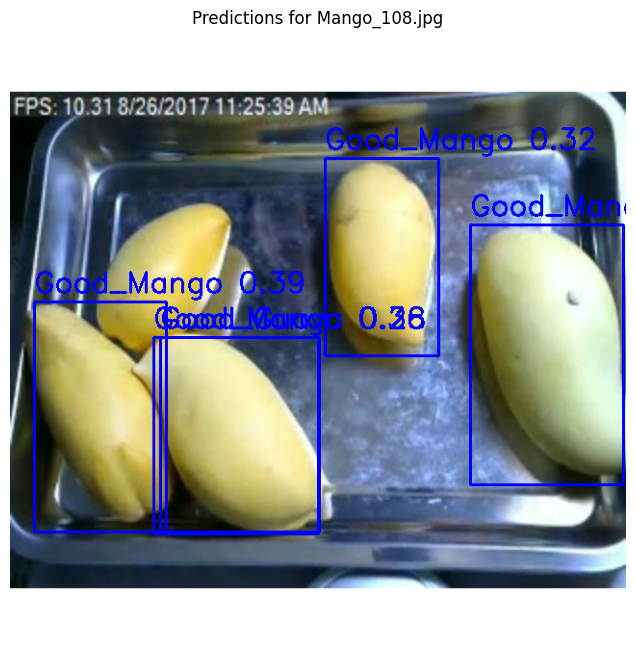

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()

In [9]:
from ultralytics import YOLO

# Load the last trained model
model = YOLO('/kaggle/working/fruitnet_training_scratch/experiment12/weights/last.pt')

# Train again with additional epochs
model.train(
    data='/kaggle/working/data.yaml',  # Path to your dataset config
    epochs=10,  # Additional epochs
    imgsz=640,
    batch=16,
    project='/kaggle/working/fruitnet_training_scratch',
    name='experiment12_continued',
    resume=False  # Ensure it starts fresh training from the previous weights
)

print("✅ Training resumed successfully!")


Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/fruitnet_training_scratch/experiment12/weights/last.pt, data=/kaggle/working/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/kaggle/working/fruitnet_training_scratch, name=experiment12_continued, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train/labels... 2192 images, 14 backgrounds, 0 corrupt: 100%|██████████| 2192/2192 [00:03<00:00, 603.35it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid/labels... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<00:00, 526.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/fruit-yield/FruitYield DataSet/Fruit_Annotation_Object_Det-14/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/fruitnet_training_scratch/experiment12_continued/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/fruitnet_training_scratch/experiment12_continued
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.89G     0.5147      1.159      1.127         16        640: 100%|██████████| 137/137 [00:36<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]

                   all        141        202      0.546      0.713      0.652       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.89G     0.5797      1.276      1.186         18        640: 100%|██████████| 137/137 [00:35<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        141        202      0.468      0.649      0.642       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.89G     0.5793      1.235      1.171         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        141        202      0.493      0.576      0.601       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.89G     0.5653      1.151      1.151         19        640: 100%|██████████| 137/137 [00:34<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

                   all        141        202      0.445      0.614      0.609      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.89G     0.5467      1.082      1.133         21        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all        141        202      0.542      0.671      0.709      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.89G     0.5044     0.9992      1.085         18        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all        141        202        0.6      0.669      0.732      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.89G     0.4694     0.8983      1.061         29        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all        141        202       0.57      0.719      0.773      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.89G     0.4433     0.8177      1.045         21        640: 100%|██████████| 137/137 [00:34<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        141        202      0.793      0.672      0.823      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.89G       0.43     0.7525       1.03         17        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        141        202      0.801      0.684      0.836      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.89G     0.4052     0.7104      1.013         22        640: 100%|██████████| 137/137 [00:34<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all        141        202      0.802      0.736      0.862      0.788



10 epochs completed in 0.103 hours.
Optimizer stripped from /kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/last.pt, 22.5MB
Optimizer stripped from /kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt, 22.5MB

Validating /kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]


                   all        141        202      0.802      0.736      0.862      0.788
             Bad_Apple         25         26      0.774      0.846      0.928      0.876
             Bad_Guava         15         19      0.705          1      0.969      0.887
             Bad_Mango         14         17      0.938      0.824      0.951      0.875
            Bad_Orange         27         36      0.877      0.794       0.93      0.888
            Good_Apple         15         31      0.762      0.721      0.852      0.788
            Good_Guava         15         26      0.827      0.368      0.641       0.55
            Good_Mango         15         29      0.843      0.557      0.813      0.677
           Good_Orange         15         18      0.691      0.778      0.811      0.767


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /kaggle/working/fruitnet_training_scratch/experiment12_continued
✅ Training resumed successfully!



0: 640x640 2 Good_Mangos, 16.2ms
Speed: 1.6ms preprocess, 16.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


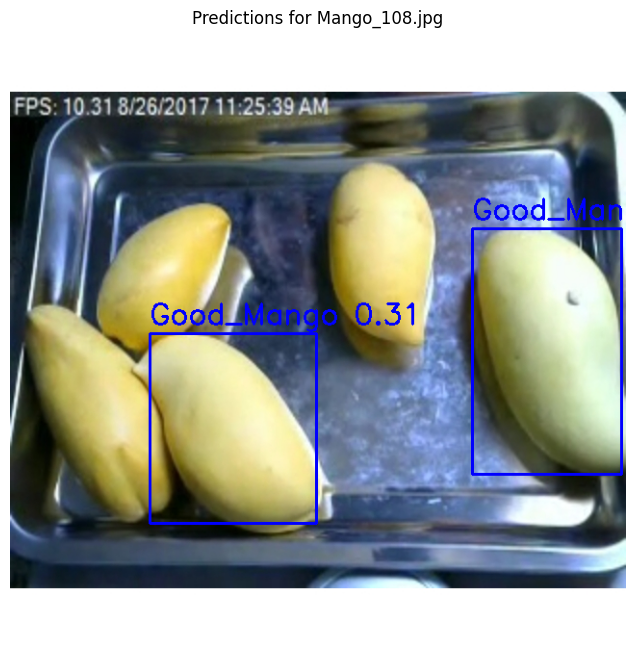

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the latest trained model
model_path = "/kaggle/working/fruitnet_training_scratch/experiment12_continued/weights/best.pt"  # Update path if needed
model = YOLO(model_path)

# ✅ Select an image for testing
test_image_path = "/kaggle/input/fruit-yield/FruitYield DataSet/Mango/Mango_108.jpg"

# ✅ Resize the image to match training size
image = cv2.imread(test_image_path)
image = cv2.resize(image, (640, 640))  # Resize to 640x640 for consistency

# ✅ Run inference with a lower confidence threshold
results = model.predict(image, conf=0.25)  # Try lowering confidence

# ✅ Draw bounding boxes and labels
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()
    scores = result.boxes.conf.cpu().numpy()
    class_ids = result.boxes.cls.cpu().numpy()
    class_names = result.names

    for box, score, class_id in zip(boxes, scores, class_ids):
        if score >= 0.25:  # Lower threshold
            x1, y1, x2, y2 = map(int, box)
            label = f"{class_names[int(class_id)]} {score:.2f}"
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw bounding box
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)  # Draw label

# ✅ Display the image with detections
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Predictions for {os.path.basename(test_image_path)}")
plt.axis('off')
plt.show()